In [1]:
import numpy as np
import pandas as pd                           # importing necessary Libraries.
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# Importing Dataset.

In [3]:
data=pd.read_csv('medical_cost_insurance.csv')
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
data.shape  # To See the Shape.

(1338, 7)

In [5]:
data.isnull().sum() # to check for any null values in the column

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [6]:
# To check the Datatypes of the column

In [10]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [11]:
data.count() #No Nan values Present.

age         1338
sex         1338
bmi         1338
children    1338
smoker      1338
region      1338
charges     1338
dtype: int64

In [12]:
data['sex'].value_counts() # To Check the Seperate Value Counts.

male      676
female    662
Name: sex, dtype: int64

In [13]:
data['children'].value_counts()  # To Check Seperate value counts.

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [14]:
data['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [15]:
data['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [16]:
# we will do Encoding Technicques for all the features .

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
lab_enc=LabelEncoder()
data1=lab_enc.fit_transform(data['sex'])
data1

array([0, 1, 1, ..., 0, 0, 0])

In [19]:
data['sex']=data1
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,no,northwest,10600.54830
1334,18,0,31.920,0,no,northeast,2205.98080
1335,18,0,36.850,0,no,southeast,1629.83350
1336,21,0,25.800,0,no,southwest,2007.94500


In [20]:
data2=lab_enc.fit_transform(data['smoker'])
data2

array([1, 0, 0, ..., 0, 0, 1])

In [21]:
data['smoker']=data2
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,northwest,10600.54830
1334,18,0,31.920,0,0,northeast,2205.98080
1335,18,0,36.850,0,0,southeast,1629.83350
1336,21,0,25.800,0,0,southwest,2007.94500


In [22]:
data3=lab_enc.fit_transform(data['region'])
data3

array([3, 2, 2, ..., 2, 3, 1])

In [23]:
data['region']=data3
data

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [24]:
# Charges is a Target Variable.

C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\sony\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

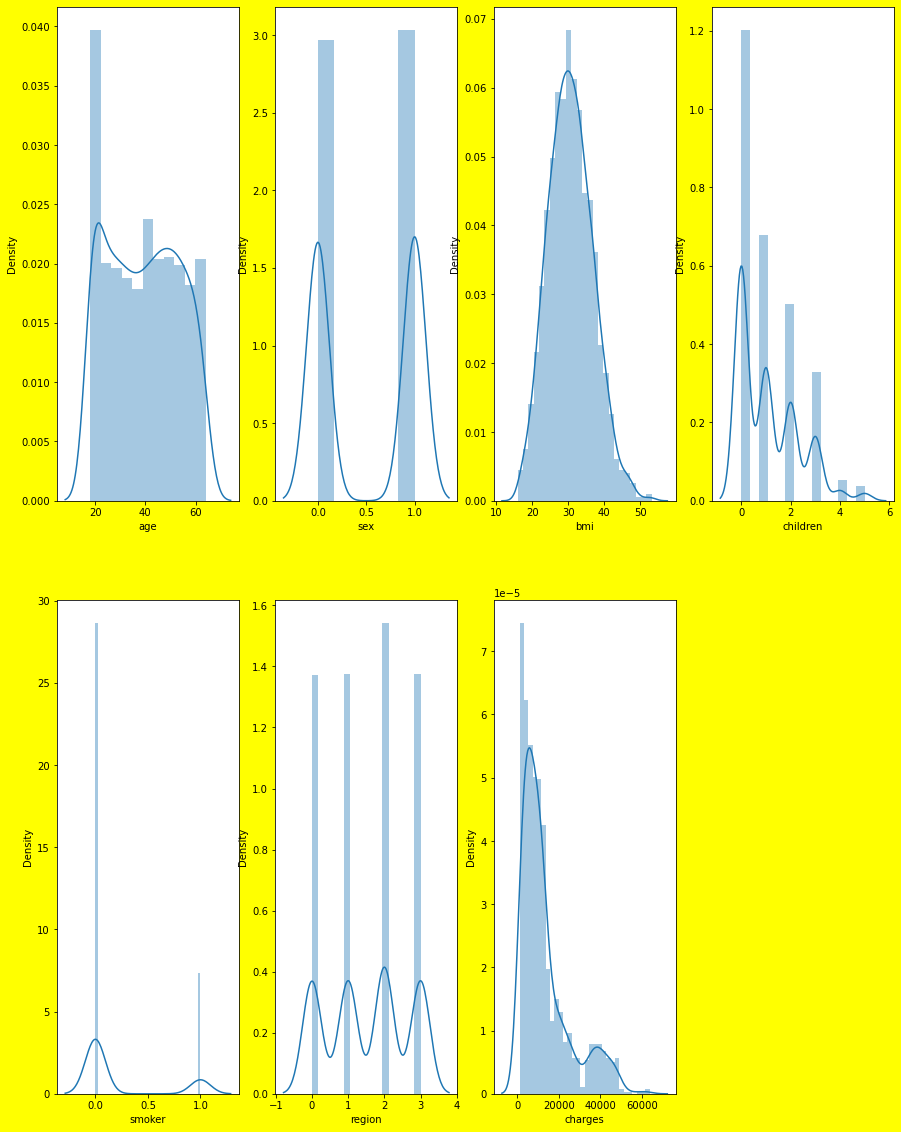

In [25]:
plt.figure(figsize=(15,20),facecolor='yellow')
plotnumber=1
for column in data:
    if plotnumber<=7:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(data[column])
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [26]:
# splitting the Dataset into features and Target

In [27]:
x=data.drop(columns='charges',axis=1)
x

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,3
1,18,1,33.770,1,0,2
2,28,1,33.000,3,0,2
3,33,1,22.705,0,0,1
4,32,1,28.880,0,0,1
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1
1334,18,0,31.920,0,0,0
1335,18,0,36.850,0,0,2
1336,21,0,25.800,0,0,3


In [28]:
y=data['charges']
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [29]:
# we will see the relationship between each column and target

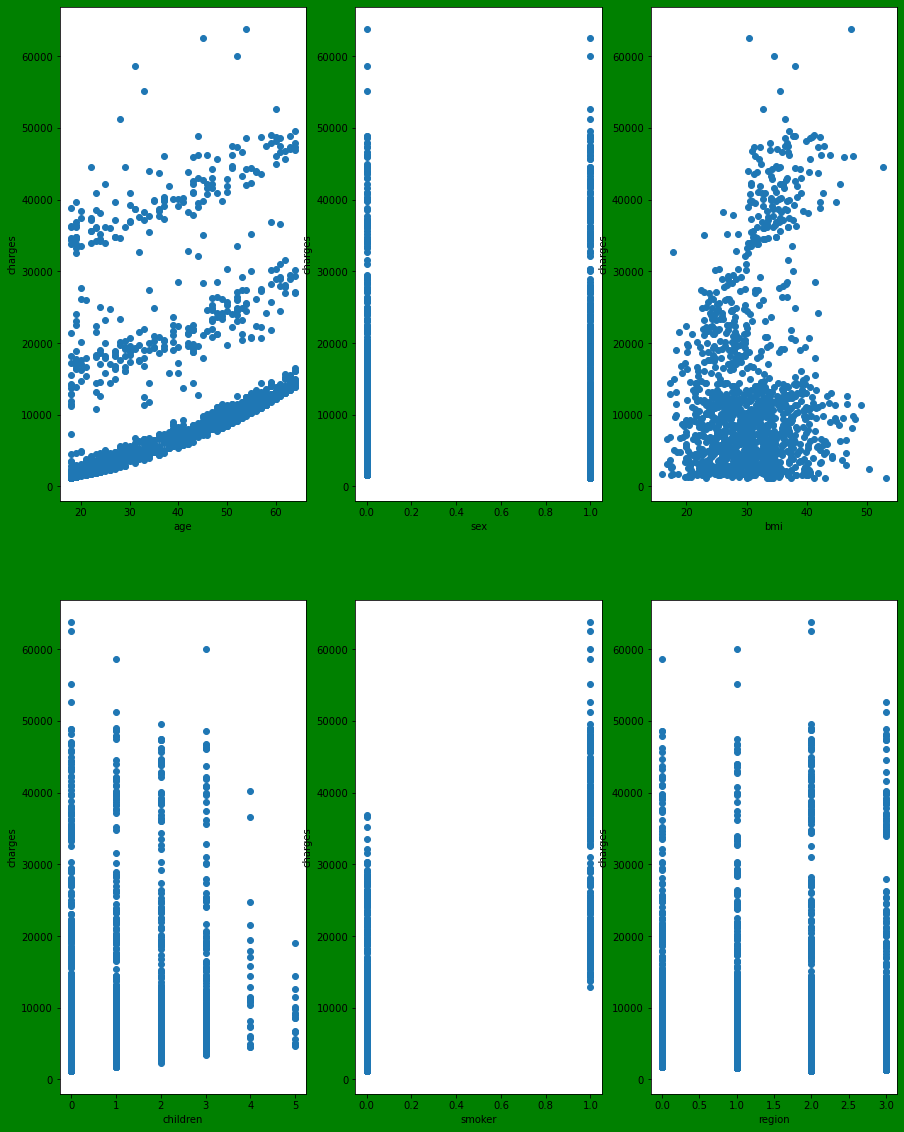

In [30]:
plt.figure(figsize=(15,20),facecolor='Green')
graph=1
for column in x:
    if graph<=6:
        ax=plt.subplot(2,3,graph)
        plt.scatter(x[column],y)
        plt.xlabel(column)
        plt.ylabel('charges')
        
    graph+=1
plt.show()
    
    

In [31]:
# we can also see the coorelation using heatmap


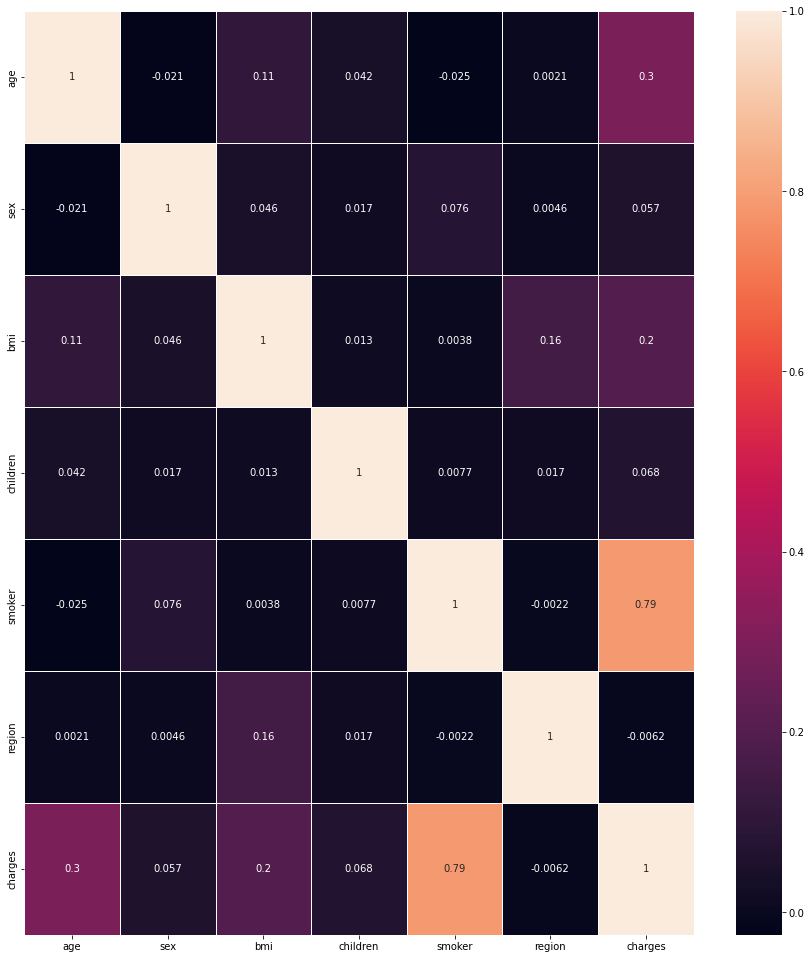

In [32]:
datacorr=data.corr()
plt.figure(figsize=(15,17))
sns.heatmap(data=datacorr,annot=True,linewidths=0.5)
plt.show()


In [33]:
# From the heatMap,we can see that "smoker" is having "STRONG BOND " with TargetVariable Charges 
# From the heatMap,we can alsoSee that,"Age" is having "MEDIUM BOND " with Target Variable Charges.
# we can also See ,that "region" is having "WEAK BOND" with Target Variable.

In [41]:
data.describe() # To See the Descriptive Statistics.

,age,sex,bmi,children,smoker,region,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,1.515695,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,1.104885,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,1.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,2.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,2.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,3.000000,63770.428010


In [42]:
data.skew() # we dont See Much Skewness ,we will not treat that.

age         0.055673
sex        -0.020951
bmi         0.284047
children    0.938380
smoker      1.464766
region     -0.038101
charges     1.515880
dtype: float64

In [34]:
# we will import Standardization and standardize our data.

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

In [37]:
scaler=StandardScaler()
x_scaler=scaler.fit_transform(x)
x_scaler

array([[-1.43876426, -1.0105187 , -0.45332   , -0.90861367,  1.97058663,
         1.34390459],
       [-1.50996545,  0.98959079,  0.5096211 , -0.07876719, -0.5074631 ,
         0.43849455],
       [-0.79795355,  0.98959079,  0.38330685,  1.58092576, -0.5074631 ,
         0.43849455],
       ...,
       [-1.50996545, -1.0105187 ,  1.0148781 , -0.90861367, -0.5074631 ,
         0.43849455],
       [-1.29636188, -1.0105187 , -0.79781341, -0.90861367, -0.5074631 ,
         1.34390459],
       [ 1.55168573, -1.0105187 , -0.26138796, -0.90861367,  1.97058663,
        -0.46691549]])

In [38]:
# splitting the Model into Train_Test_split

In [40]:
from sklearn.model_selection import train_test_split


In [65]:
lin_reg=LinearRegression()
for i in range(0,100):
    x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=0.25,random_state=i)
    lin_reg.fit(x_train,y_train)
    pred_train=lin_reg.predict(x_train)
    pred_test=lin_reg.predict(x_test)
    print("At Random state:",i)
    print("The Training accuracy is :",r2_score(y_train,pred_train)*100)
    print("The Testing accuracy is :",r2_score(y_test,pred_test)*100)
    print("\n")
        
        
              
    
    

At Random state: 0
The Training accuracy is : 73.37162219022217
The Testing accuracy is : 79.62732059725785


At Random state: 1
The Training accuracy is : 75.51158429564245
The Testing accuracy is : 73.38069544102044


At Random state: 2
The Training accuracy is : 75.04461382870366
The Testing accuracy is : 74.97081429580857


At Random state: 3
The Training accuracy is : 75.55554974605857
The Testing accuracy is : 73.40509447064585


At Random state: 4
The Training accuracy is : 76.31741807992287
The Testing accuracy is : 71.01754116127834


At Random state: 5
The Training accuracy is : 74.60940358926128
The Testing accuracy is : 76.199416327778


At Random state: 6
The Training accuracy is : 74.10034398879147
The Testing accuracy is : 78.07190943598728


At Random state: 7
The Training accuracy is : 75.0383378126627
The Testing accuracy is : 75.12394831968716


At Random state: 8
The Training accuracy is : 75.16038121192469
The Testing accuracy is : 74.40482125083128


At Random sta

In [66]:
# we have choose ,Random State =32 and split the model

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x_scaler,y,test_size=.25,random_state=32)

In [68]:
lin_reg=LinearRegression()    # Fitting the Model with Linear Regression.
lin_reg.fit(x_train,y_train)

LinearRegression()

In [69]:
lin_reg.score(x_train,y_train)    # Got the Train Score.

0.7356489898724439

In [70]:
pred_train=lin_reg.predict(x_train)
pred_train

array([ 5341.7005235 , 15777.54567845, 38379.8083284 , ...,
       10177.88383726,  3739.40871458, 27100.18935144])

In [50]:
# Test the Model.

In [71]:
lin_reg.fit(x_test,y_test)

LinearRegression()

In [72]:
pred_test=lin_reg.predict(x_test)
pred_test

array([ 1.07401356e+04,  2.69715826e+04,  5.85603456e+03,  9.79033198e+03,
        9.27438232e+03,  1.47998529e+03,  3.82243624e+04,  2.96214569e+03,
        5.98812065e+03,  1.19630635e+04,  3.48836955e+03,  2.96359731e+03,
        1.35900737e+04,  3.84631549e+04,  1.49919120e+04,  3.68584023e+04,
        1.50730523e+04,  1.08569055e+04,  1.27063012e+04,  8.03993624e+03,
        6.52780378e+03,  9.49810733e+03,  1.55796728e+04,  4.41593516e+03,
        3.69651105e+04,  1.42752306e+03,  9.63043169e+03,  2.67888823e+04,
        1.14056479e+04,  3.07894201e+04,  2.76323552e+03,  6.37559801e+03,
        2.12315672e+03,  1.06193415e+04,  1.03128964e+04,  3.36611823e+04,
        7.82396506e+03,  9.56095285e+03,  1.57724801e+04,  1.49352138e+04,
        4.44426430e+03,  6.24754096e+02,  9.20385653e+03,  4.39559277e+03,
        4.88922876e+03,  7.15737287e+03,  9.12850937e+03,  4.64634465e+03,
        1.15094978e+04,  2.96823181e+04,  2.71965532e+04,  3.74968213e+04,
        3.35130229e+03,  

In [62]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [75]:
mean_absolute_error(y_test,pred_test)

3639.02772898396

In [80]:
train_score=r2_score(y_train,pred_train)
train_score

0.7356489898724439

In [79]:
test_score=r2_score(y_test,pred_test)
test_score

0.8013064166812089

In [74]:
 # CROSS VALIDATION

In [90]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [83]:
for j in range(2,10):
    cv_score=cross_val_score(lin_reg,x,y,cv=j)
    cv_mean=cv_score.mean()
    print("At Cross fold",j,"The CV Score is:",cv_mean,"The training score:",r2_score(y_train,pred_train),"The testing score:",r2_score(y_test,pred_test) )
    print("\n")

At Cross fold 2 The CV Score is: 0.7486033254037109 The training score: 0.7356489898724439 The testing score: 0.8013064166812089


At Cross fold 3 The CV Score is: 0.7448455049684156 The training score: 0.7356489898724439 The testing score: 0.8013064166812089


At Cross fold 4 The CV Score is: 0.7465374465214437 The training score: 0.7356489898724439 The testing score: 0.8013064166812089


At Cross fold 5 The CV Score is: 0.7472559473580954 The training score: 0.7356489898724439 The testing score: 0.8013064166812089


At Cross fold 6 The CV Score is: 0.7458863313669323 The training score: 0.7356489898724439 The testing score: 0.8013064166812089


At Cross fold 7 The CV Score is: 0.7452991860582022 The training score: 0.7356489898724439 The testing score: 0.8013064166812089


At Cross fold 8 The CV Score is: 0.7430633572874521 The training score: 0.7356489898724439 The testing score: 0.8013064166812089


At Cross fold 9 The CV Score is: 0.7432123565964317 The training score: 0.735648989

In [84]:
# Since the no of folds dont have much effect on the accuracy,we are selecting cv=4. we dont have overfit or underfit 

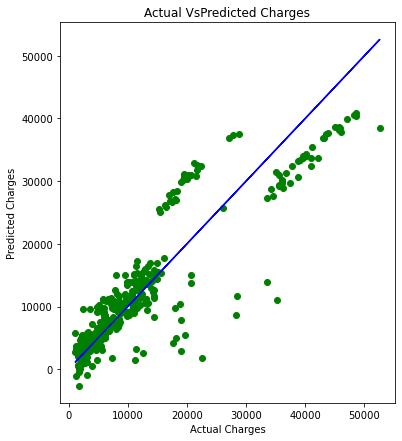

In [86]:
plt.figure(figsize=(6,7))
plt.scatter(x=y_test,y=pred_test,color='green')
plt.plot(y_test,y_test,color='b')
plt.xlabel('Actual Charges')
plt.ylabel('Predicted Charges')
plt.title('Actual VsPredicted Charges')
plt.show()

In [87]:
from sklearn.linear_model import Lasso

In [88]:
ls=Lasso()

In [89]:
parameters={'alpha':[0.0,0.5,0.02,0.3,0.4,1],"max_iter":[100,1000,100],"random_state":range(0,10)}


In [91]:
Grd=GridSearchCV(ls,parameters)
Grd.fit(x_train,y_train)

C:\Users\sony\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:680: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  estimator.fit(X_train, y_train, **fit_params)
C:\Users\sony\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
C:\Users\sony\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.623e+10, tolerance: 1.245e+07 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0, 0.5, 0.02, 0.3, 0.4, 1],
                         'max_iter': [100, 1000, 100],
                         'random_state': range(0, 10)})

In [92]:
print(Grd.best_params_)

{'alpha': 1, 'max_iter': 100, 'random_state': 0}


In [98]:
# final training.
ls=Lasso(alpha= 1, max_iter= 100, random_state= 0)
ls.fit(x_train,y_train)
la_pred_test=ls.predict(x_test)
la_pred_test



array([10818.12079557, 26246.64744873,  6148.899896  , 11141.09959325,
        8595.40782564,  2949.63323349, 38314.40945872,  3745.15370055,
        5997.68379039, 12674.61990951,  4397.37450307,  2366.5011957 ,
       14177.21721128, 37515.90110278, 15941.28105156, 35802.31870368,
       16472.8415584 , 11038.64291568, 13169.9243644 ,  7405.32799777,
        8332.12170476,  9854.67318773, 15607.56960918,  5791.2375569 ,
       36834.52373999,   732.49063025, 10567.26573053, 25568.97999137,
       11570.93885151, 31029.27876506,  3180.05677331,  7725.51706505,
        3124.92144951, 10568.71132329, 10182.04754176, 34194.39163941,
        9240.081251  , 10317.79756002, 15921.16261727, 15437.11853383,
        5468.66993675,  1269.45703333, 10382.31524094,  4551.7907355 ,
        6019.20235898,  8009.42017218,  9359.8325983 ,  5780.9373999 ,
       12563.03404055, 28876.44740991, 26435.96613681, 36457.15370915,
        4116.48634426,  5742.59266877, 15142.05452379, 25772.70108664,
      

In [99]:
r2_score(y_test,la_pred_test)

0.7961549270087303

In [100]:
def model_selection(algorithm,x_train,x_test,y_train,y_test):
    algorithm.fit(x_train,y_train)
    mod_pred_train=algorithm.predict(x_train)
    mod_pred_test=algorithm.predict(x_test)
    print("The r2 score of the training data:",r2_score(y_train,mod_pred_train))
    print("The r2 score of the training data:",r2_score(y_test,mod_pred_test))
    


In [101]:
from sklearn.ensemble import RandomForestRegressor

In [102]:
rf=RandomForestRegressor()

In [103]:
model_selection(rf,x_train,x_test,y_train,y_test)

The r2 score of the training data: 0.9756583374639543
The r2 score of the training data: 0.8554513953263674


In [106]:
parameters={'criterion':['mse','mae'],'n_estimators':[0,100,10],'max_features':['auto','sqrt','log2']}
Grd=GridSearchCV(rf,parameters)
Grd.fit(x_train,y_train)
print(Grd.best_params_)


C:\Users\sony\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\sony\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\sony\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\sony\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warn(
C:\Users\sony\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:396: FutureWarning: Criter

{'criterion': 'mae', 'max_features': 'log2', 'n_estimators': 100}


In [111]:
rf=RandomForestRegressor(criterion= 'mae', max_features= 'log2', n_estimators= 100)
rf.fit(x_train,y_train)
pred_rf_train=rf.predict(x_train)
train_rf_score=r2_score(y_train,pred_rf_train)
print(train_rf_score)
pred_rf_test=rf.predict(x_test)

C:\Users\sony\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


0.9670850031833838


In [112]:
rf_score=r2_score(y_test,pred_rf_test)
rf_score *100

86.59495848072322

In [114]:
rf_cv_score=cross_val_score(rf,x,y,cv=4)
rf_cv_mean=rf_cv_score.mean()
print("Cross_Val_score:",rf_cv_mean*100)
print("R2 score of Regressor:",rf_score*100)

C:\Users\sony\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\sony\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\sony\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(
C:\Users\sony\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:403: FutureWarning: Criterion 'mae' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='absolute_error'` which is equivalent.
  warn(


Cross_Val_score: 83.67423795091818
R2 score of Regressor: 86.59495848072322


In [115]:
import pickle
filename='medical_cost_insurance.pkl'
pickle.dump(rf,open(filename,'wb'))

In [116]:
                    # CONCLUSION

In [123]:
loaded_model=pickle.load(open('medical_cost_insurance.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result*100)

86.59495848072322
